In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
def softmax(x): # es el que indica con porcentajes nuestras salidas
    return np.exp(x) / np.exp(x).sum(axis=-1,keepdims=True)

In [30]:
# aplica softmax + cross entropy de manera estable
#funcion de perdida
def crossentropy(output, target):
    logits = output[np.arange(len(output)),target]
    entropy = - logits + np.log(np.sum(np.exp(output),axis=-1))
    return entropy
#funcion de calificador de imagenes
def grad_crossentropy(output, target):
    answers = np.zeros_like(output)
    answers[np.arange(len(output)),target] = 1    
    return (- answers + softmax(output)) / output.shape[0]

In [31]:
class Perceptron(): #Neurona artificial
  def __init__(self, inputs, outputs):
    self.w = np.random.normal(loc=0.0, 
          scale = np.sqrt(2/(inputs+outputs)), 
          size = (inputs, outputs)) 
    self.ws = []
    self.loss = crossentropy
    self.grad_loss = grad_crossentropy
    
  def __call__(self, w, x):
    return np.dot(x, w) 

  def fit(self, x, y, epochs, lr, verbose=True, log_each=1):
    x = np.c_[np.ones(len(x)), x]
    for epoch in range(1,epochs+1):
        # Batch Gradient Descent
        y_hat = self(self.w, x)  
        # función de pérdida
        l = self.loss(y_hat, y).mean()
        # derivadas
        dldh = self.grad_loss(y_hat, y)
        dhdw = x
        dldw = np.dot(dhdw.T, dldh)
        # actualizar pesos
        self.w = self.w - lr*dldw
        # guardar pesos para animación
        self.ws.append(self.w.copy())
        # print loss
        if verbose and not epoch % log_each:
            print(f"Epoch {epoch}/{epochs} Loss {l}")
            
  def predict(self, x):
    x = np.c_[np.ones(len(x)), x]
    return self(self.w, x)

In [ ]:
# from sklearn.datasets import fetch_openml

# mnist = fetch_openml('mnist_784', version=1)
# X, y = mnist["data"], mnist["target"]

# X.shape, y.shape

In [32]:
import pandas as pd
import numpy as np

X_data_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/emnist-mnist-train.csv")
X_data_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/emnist-mnist-test.csv")

#classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

X_train = X_data_train.iloc[:, 1:].values/255 # Normalizacion
y_train = X_data_train.iloc[:,0]

X_test = X_data_test.iloc[:, 1:].values/255
y_test = X_data_test.iloc[:, 0]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((59999, 784), (59999,), (9999, 784), (9999,))

In [33]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import random 

# r, c = 3, 5
# fig = plt.figure(figsize=(2*c, 2*r))
# for _r in range(r):
#     for _c in range(c):
#         plt.subplot(r, c, _r*c + _c + 1)
#         ix = random.randint(0, len(X)-1)
#         img = X[ix]
#         plt.imshow(img.reshape(28,28), cmap='gray')
#         plt.axis("off")
#         plt.title(y[ix])
# plt.tight_layout()
# plt.show()

In [ ]:
# X_train, X_test, y_train, y_test = X[:60000] / 255., X[60000:] / 255., y[:60000].astype(np.int), y[60000:].astype(np.int)

In [34]:
# entranamos un perceptron para clasificación en 10 clases a partir de los pixeles de cada imágen

perceptron = Perceptron(785, 10)
epochs, lr = 300, 0.2
perceptron.fit(X_train, y_train, epochs, lr, log_each=10)

Epoch 10/300 Loss 1.1501798772406804
Epoch 20/300 Loss 0.8116507831337956
Epoch 30/300 Loss 0.6736134843854207
Epoch 40/300 Loss 0.596791077007988
Epoch 50/300 Loss 0.5468155668746779
Epoch 60/300 Loss 0.5112148092322245
Epoch 70/300 Loss 0.484311022607066
Epoch 80/300 Loss 0.46311831316948004
Epoch 90/300 Loss 0.4459024682671656
Epoch 100/300 Loss 0.4315806106391267
Epoch 110/300 Loss 0.41943827322480615
Epoch 120/300 Loss 0.40898319758478474
Epoch 130/300 Loss 0.39986416358096444
Epoch 140/300 Loss 0.391823257775295
Epoch 150/300 Loss 0.38466645250418025
Epoch 160/300 Loss 0.37824474559466775
Epoch 170/300 Loss 0.3724416617475282
Epoch 180/300 Loss 0.3671647306058372
Epoch 190/300 Loss 0.36233953109836786
Epoch 200/300 Loss 0.35790543838939876
Epoch 210/300 Loss 0.3538125282264311
Epoch 220/300 Loss 0.35001928516910596
Epoch 230/300 Loss 0.3464908799663624
Epoch 240/300 Loss 0.3431978568788711
Epoch 250/300 Loss 0.3401151208926737
Epoch 260/300 Loss 0.33722114742414344
Epoch 270/300 

In [35]:
def evaluate(x):
    y = perceptron.predict(x)
    y_probas = softmax(y)
    return np.argmax(y_probas, axis=1)

In [36]:
from sklearn.metrics import accuracy_score

y_pred = evaluate(X_test)
accuracy_score(y_test, y_pred)

0.9096909690969097

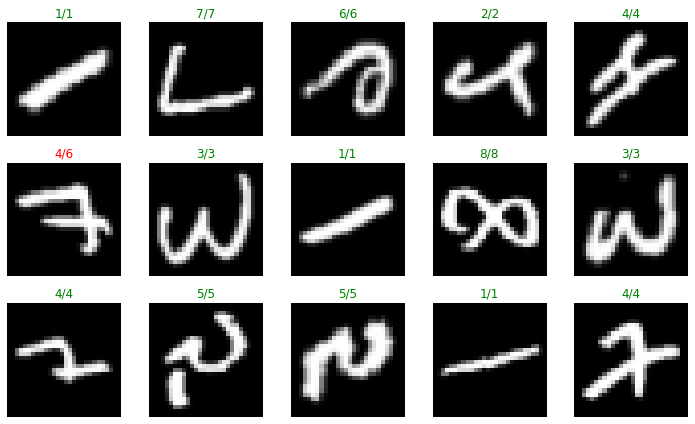

In [37]:
r, c = 3, 5
fig = plt.figure(figsize=(2*c, 2*r))
test_imgs, test_labs = [], []
for _r in range(r):
    for _c in range(c):
        plt.subplot(r, c, _r*c + _c + 1)
        ix = random.randint(0, len(X_test)-1)
        img = X_test[ix]
        y_pred = evaluate([img])[0]
        plt.imshow(img.reshape(28,28), cmap='gray')
        plt.axis("off")
        plt.title(f"{y_test[ix]}/{y_pred}", color="green" if y_test[ix] == y_pred else "red")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

X_data_train = pd.read_csv("/content/fashion-mnist_test.csv")

classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

X_train = X_data_train.iloc[:, 1:].values/255
Y_train = X_data_train.iloc[:,0]
X_train.shape, Y_train.shape

((10000, 784), (10000,))

In [ ]:
X_data_train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
model = MLPClassification(D_in=784, H=100, D_out=10)
epochs = 100  # Numero de epocas
lr =  0.2 # Coeficiente de aprendizaje
model.fit(X_train, Y_train, epochs, lr, batch_size=10, log_each=10)

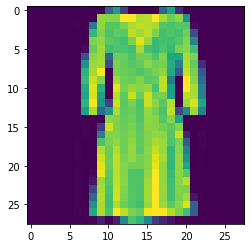

In [ ]:
plt.imshow(np.reshape(X_train[10],(28,28)))